## Recurrent Neural Networks (RNN)

Recurrent Neural Networks (RNNs) are a class of neural networks designed to handle **sequential data** where order matters, such as:
- **Time series data** (stock prices, weather data)
- **Natural language** (text, speech)
- **Video frames**

Unlike traditional feedforward networks, RNNs have **loops** that allow information to persist across time steps, enabling them to learn **temporal dependencies**.

- Traditional neural networks treat inputs and outputs as **independent**.
- RNNs introduce a **hidden state** that carries information from previous time steps, giving the network a **memory**.

At each time step `t`:
- **Input:** \( x_t \) (current input)
- **Hidden state:** \( h_t \) (depends on \( h_{t-1} \) and \( x_t \))
- **Output:** \( y_t \)

The hidden state acts as a **summary of past inputs**.

### RNN Architecture

1. `Input Layer`: Takes a sequence of inputs (x₁, x₂, x₃, …).
2. `Hidden State (hₜ)`: Stores information about previous inputs. At each time step t, the hidden state is updated using the current input and the previous hidden state:

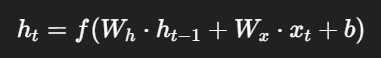

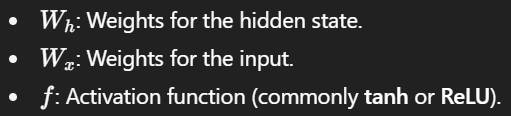

3. Output Layer: Produces an output (yₜ) at each time step:

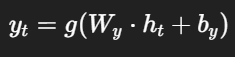

### Types of RNN
| Type                           | Description                                           | Example Use Case                   |
|--------------------------------|-------------------------------------------------------|-------------------------------------|
| **Many-to-One**                | Sequence input → Single output                        | Sentiment analysis, fraud detection |
| **One-to-Many**                | Single input → Sequence output                        | Image captioning                    |
| **Many-to-Many (synchronous)** | Input & output sequences have the **same length**      | Named Entity Recognition (NER)      |
| **Many-to-Many (asynchronous)**| Input & output sequences have **different lengths**   | Machine translation                  |

### Training RNNs

### Backpropagation Through Time (BPTT)
- RNNs are trained using **Backpropagation Through Time**, where the network is **unrolled** across time steps and gradients are computed for each step.

### Challenges
1. **Vanishing Gradient Problem**  
   - Gradients shrink during backpropagation, making it hard to learn long-term dependencies.
2. **Exploding Gradient Problem**  
   - Gradients grow uncontrollably, leading to unstable training.

### Solutions
- **Gradient Clipping** to control exploding gradients.
- Use advanced RNN variants such as **LSTM** and **GRU** to handle vanishing gradients.

## Variants of RNN

### Long Short-Term Memory (LSTM)
- Designed to remember **long-term dependencies** using:
  - **Input gate**: Controls new information entering memory.
  - **Forget gate**: Decides what to discard.
  - **Output gate**: Controls the output from memory.
- Suitable for tasks like **speech recognition** or **language translation**.

### Gated Recurrent Unit (GRU)
- A simplified LSTM with:
  - **Update gate**
  - **Reset gate**
- Faster training and fewer parameters compared to LSTM.

## Applications
- **Natural Language Processing (NLP):**
  - Language modeling, text generation, sentiment analysis, machine translation.
- **Time Series Forecasting:**
  - Stock price prediction, weather forecasting, energy demand.
- **Speech & Audio Processing:**
  - Speech-to-text, music generation.
- **Video Analysis:**
  - Action recognition in video sequences.

## Advantages
- Captures **temporal dependencies** in sequential data.
- Handles variable-length inputs and outputs.
- Effective for tasks where **context** is important.

## Limitations
- Difficult to train on long sequences due to **vanishing/exploding gradients**.
- Computationally expensive compared to feedforward networks.
- Slower inference for long sequences.

### Implementing a Text Generator Using Recurrent Neural Networks (RNNs)

We'll implement an RNN that learns patterns from a text sequence to generate new text character-by-character.

#### Importing Necessary Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

#### Defining the Input Text and Prepare Character Set
We define the input text and identify unique characters in the text which we’ll encode for our model.

In [3]:
text = "This is Zindua School a software training institute"
chars = sorted(list(set(text)))
char_to_index = {char: i for i, char in enumerate(chars)}
index_to_char = {i: char for i, char in enumerate(chars)}

#### Creating Sequences and Labels
To train the RNN, we need sequences of fixed length (seq_length) and the character following each sequence as the label.

In [4]:
seq_length = 3
sequences = []
labels = []

for i in range(len(text) - seq_length):
    seq = text[i:i + seq_length]
    label = text[i + seq_length]
    sequences.append([char_to_index[char] for char in seq])
    labels.append(char_to_index[label])

X = np.array(sequences)
y = np.array(labels)

#### Converting Sequences and Labels to One-Hot Encoding
For training we convert X and y into one-hot encoded tensors.

In [5]:
X_one_hot = tf.one_hot(X, len(chars))
y_one_hot = tf.one_hot(y, len(chars))

#### Building the RNN Model
We create a simple RNN model with a hidden layer of 50 units and a Dense output layer with softmax activation.

In [6]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(seq_length, len(chars)), activation='relu'))
model.add(Dense(len(chars), activation='softmax'))

c:\Users\user\Desktop\data-science-class\07-Deep_Learning\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### Compiling and Training the Model
We compile the model using the categorical_crossentropy loss and train it for 100 epochs.

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_one_hot, y_one_hot, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.0625 - loss: 3.0230
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.0625 - loss: 2.9990
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.1042 - loss: 2.9772
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.1458 - loss: 2.9575
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.1458 - loss: 2.9365
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.1875 - loss: 2.9191 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.1875 - loss: 2.8987
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.1875 - loss: 2.8796
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.2083 - loss: 2.8607
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2083 - loss: 2.8403
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.2292 - loss: 2.8205
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.2917 

#### Generating New Text Using the Trained Model
After training we use a starting sequence to generate new text character by character.

In [8]:
start_seq = "This is Z"
generated_text = start_seq

for i in range(50):
    x = np.array([[char_to_index[char] for char in generated_text[-seq_length:]]])
    x_one_hot = tf.one_hot(x, len(chars))
    prediction = model.predict(x_one_hot)
    next_index = np.argmax(prediction)
    next_char = index_to_char[next_index]
    generated_text += next_char

print("Generated Text:")
print(generated_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step